# 08 FBS decoupling with VPT
This tutorial shows the application of the virtual point transformation to perform substructure decoupling in the classic LM-FBS framework. The operations are performed with numerically obtained FRFs.

In [1]:
import pyFBS

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Data Import
Load the required predefined datasets:

In [2]:
pyFBS.download_lab_testbench()

100%|████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<?, ?it/s]

In [3]:
pos_xlsx = r"./lab_testbench/Measurements/decoupling_example.xlsx"

stl_dir_A = r"./lab_testbench/STL/A.stl"
stl_dir_B = r"./lab_testbench/STL/B.stl"
stl_dir_AB = r"./lab_testbench/STL/AB.stl"

df_acc_A = pd.read_excel(pos_xlsx, sheet_name='Sensors_A')
df_chn_A = pd.read_excel(pos_xlsx, sheet_name='Channels_A')
df_imp_A = pd.read_excel(pos_xlsx, sheet_name='Impacts_A')

df_acc_B = pd.read_excel(pos_xlsx, sheet_name='Sensors_B')
df_chn_B = pd.read_excel(pos_xlsx, sheet_name='Channels_B')
df_imp_B = pd.read_excel(pos_xlsx, sheet_name='Impacts_B')

df_acc_AB = pd.read_excel(pos_xlsx, sheet_name='Sensors_AB')
df_chn_AB = pd.read_excel(pos_xlsx, sheet_name='Channels_AB')
df_imp_AB = pd.read_excel(pos_xlsx, sheet_name='Impacts_AB')

## 3D view
Open 3D viewer in the background. With the 3D viewer the subplot capabilities of [PyVista](https://docs.pyvista.org/index.html) can be used.

In [4]:
view3D = pyFBS.view3D(show_origin = False, show_axes = False,shape =  (1,3),title = "Overview")

Add the STL file of substructure A to the 1-1 subplot and show the corresponding accelerometers, channels and impacts.

In [5]:
view3D.plot.subplot(0,0)
view3D.plot.isometric_view()
view3D.plot.add_text("A structure", position='upper_left', font_size=10, color="k", font="times", name="A_structure")

view3D.add_stl(stl_dir_A,color = "#83afd2",name = "A");
view3D.show_acc(df_acc_A,scale = 1000)
view3D.show_imp(df_imp_A,scale = 1000)
view3D.show_chn(df_chn_A,scale = 1000)

Add the STL file of substructure B to the 1-2 subplot and show the corresponding accelerometers, channels and impacts.

In [6]:
view3D.plot.subplot(0,1)
view3D.plot.isometric_view()
view3D.plot.add_text("B structure", position='upper_left', font_size=10, color="k", font="times", name="B_structure")

view3D.add_stl(stl_dir_B,color = "#83afd2",name = "B");
view3D.show_acc(df_acc_B,scale = 1000,overwrite = False)
view3D.show_imp(df_imp_B,scale = 1000,overwrite = False)
view3D.show_chn(df_chn_B,scale = 1000,overwrite = False)

Add STL file of the assembly AB to the 1-2 subplot and show the corresponding reference accelerometers, channels and impacts.

In [7]:
view3D.plot.subplot(0,2)
view3D.plot.isometric_view()
view3D.plot.add_text("AB structure", position='upper_left', font_size=10, color="k", font="times", name="AB_structure");

view3D.add_stl(stl_dir_AB,color = "#83afd2",name = "AB");
view3D.show_acc(df_acc_AB,scale = 1000,overwrite = False)
view3D.show_imp(df_imp_AB,scale = 1000,overwrite = False)
view3D.show_chn(df_chn_AB,scale = 1000,overwrite = False)

Each separate subplot view can also be linked or unlinked:

In [8]:
view3D.plot.link_views()
#view3D.plot.unlink_views()

## Numerical model
Load the corresponding .full and .ress file from the example datasets. For more information on .full and .ress files refer to the *03_FRF_synthetization.ipynb* example.

In [9]:
full_file_AB = r"./lab_testbench/FEM/AB.full"
ress_file_AB = r"./lab_testbench/FEM/AB.rst"

full_file_B = r"./lab_testbench/FEM/B.full"
ress_file_B = r"./lab_testbench/FEM/B.rst"

full_file_A = r"./lab_testbench/FEM/A.full"
ress_file_A = r"./lab_testbench/FEM/A.rst"

Create an MK model for each component:

In [ ]:
MK_A = pyFBS.MK_model(ress_file_A,full_file_A,no_modes = 100,allow_pickle= True,recalculate = False, scale=1000)
MK_B = pyFBS.MK_model(ress_file_B,full_file_B,no_modes = 100,allow_pickle= True,recalculate = False, scale=1000)
MK_AB = pyFBS.MK_model(ress_file_AB,full_file_AB,no_modes = 100,allow_pickle= True,recalculate = False, scale=1000)

[100]
[160]
[3]
[100]
[160]
[3]
[100]
[160]
[3]


Update locations of channels and impacts to snap to the nearest FE node.

In [11]:
df_chn_A_up = MK_A.update_locations_df(df_chn_A,scale = 1000)
df_imp_A_up = MK_A.update_locations_df(df_imp_A,scale = 1000)

df_chn_B_up = MK_B.update_locations_df(df_chn_B,scale = 1000)
df_imp_B_up = MK_B.update_locations_df(df_imp_B,scale = 1000)

df_chn_AB_up = MK_AB.update_locations_df(df_chn_AB,scale = 1000)
df_imp_AB_up = MK_AB.update_locations_df(df_imp_AB,scale = 1000)

Perform the FRF sythetization for each component based on the updated locations.

In [12]:
MK_A.FRF_synth(df_chn_A_up,df_imp_A_up,f_start = 0,modal_damping = 0.003)
MK_B.FRF_synth(df_chn_B_up,df_imp_B_up,f_start = 0,modal_damping = 0.003)
MK_AB.FRF_synth(df_chn_AB_up,df_imp_AB_up,f_start = 0,modal_damping = 0.003)

## Virtual point transformation
It would be impractical to measure interface admittance for both substructures in multiple DoFs at the interface and furthermore ensure, that these DoFs are perfectly collocated. Therefore we adopt VPT in order to obtain a collocated full-DoF interface admittance matrix for each substructure.



The VPT can be performed directly on the generated data. See the *04_VPT.ipynb* example for more options and details.

In [13]:
df_vp = pd.read_excel(pos_xlsx, sheet_name='VP_Channels')
df_vpref = pd.read_excel(pos_xlsx, sheet_name='VP_RefChannels')

vpt_AB = pyFBS.VPT(df_chn_AB_up,df_imp_AB_up,df_vp,df_vpref)
vpt_B = pyFBS.VPT(df_chn_B_up,df_imp_B_up,df_vp,df_vpref)

Apply the defined VP transformation on the FRFs:

In [14]:
vpt_AB.apply_VPT(MK_AB.freq,MK_AB.FRF)
vpt_B.apply_VPT(MK_B.freq,MK_B.FRF)

Extract the required FRFs and the frequency vector:

In [15]:
freq = MK_AB.freq
Y_AB = vpt_AB.vptData
Y_B = vpt_B.vptData

## LM-FBS Decoupling

First, construct an admittance matrix for the uncoupled system, containing substructure admittances. Note that the operation is equivalent to the one performed for the coupling case (see *07_FBS_coupling.ipynb*) with the difference that a minus sign here is applied on the subsystem to be decoupled.

$$\mathbf{Y}^\text{A|B} = \begin{bmatrix} 
\mathbf{Y}^\text{A} & \mathbf{0} \\
\mathbf{0} & \mathbf{Y}^\text{B}
\end{bmatrix}.$$

In [16]:
Y_ABnB = np.zeros((Y_AB.shape[0],Y_AB.shape[1]+Y_B.shape[1],Y_AB.shape[2]+Y_B.shape[2]), dtype=complex)

Y_ABnB[:,:Y_AB.shape[1],:Y_AB.shape[2]] = Y_AB
Y_ABnB[:,Y_AB.shape[1]:,Y_AB.shape[2]:] = -1*Y_B

Next the compatibility and the equilibrium conditions has to be defined through the signed Boolean matrices ``Bu`` and ``Bf``. 

$$\mathbf{B}_\text{u}\,\boldsymbol{u} = \mathbf{0}$$
$$\boldsymbol{g} = - \mathbf{B}_\text{f}^\text{T} \boldsymbol{\lambda}$$

Make sure that the correct DoFs are selected for the coupling. In the following example the 6 virtual/generalized DoFs at the interface are matched, so the size of the Boolean matrix should be 6 $\times$ 42 (42 is the sum of all DoFs from both substructures AB and B).

In [17]:
k = 6 + 12 # extended compatibility and equilibrium to internal dofs
Bu = np.zeros((k,Y_AB.shape[1]+Y_B.shape[1]))
Bu[:k,6:6+k] = 1*np.eye(k)
Bu[:k,24:24+k] = -1*np.eye(k)

Bf = np.zeros((k,Y_AB.shape[1]+Y_B.shape[1]))
Bf[:k,6:6+k] = 1*np.eye(k)
Bf[:k,24:24+k] = -1*np.eye(k)

We inspect visually if the correct DoFs from both substructures are matched:

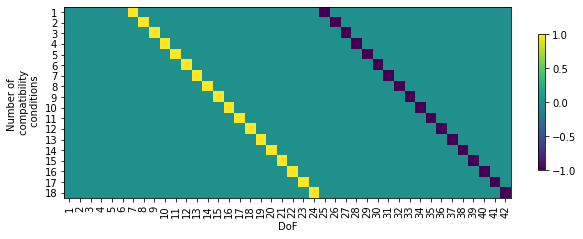

In [18]:
plt.figure(figsize=(10,5))
plt.imshow(Bu)
plt.colorbar(shrink=0.5)
plt.xlabel('DoF')
plt.ylabel('Number of \n compatibility \n conditions')
plt.xticks(np.arange(0,42,1), np.arange(1,43,1), rotation='vertical')
plt.yticks(np.arange(0,18,1), np.arange(1,19,1));

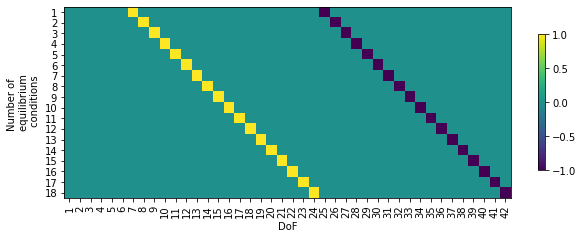

In [19]:
plt.figure(figsize=(10,5))
plt.imshow(Bf)
plt.colorbar(shrink=0.5)
plt.xlabel('DoF')
plt.ylabel('Number of \n equilibrium \n conditions')
plt.xticks(np.arange(0,42,1), np.arange(1,43,1), rotation='vertical')
plt.yticks(np.arange(0,18,1), np.arange(1,19,1));

For the LM FBS method, having defined $\mathbf{Y^{\text{A|B}}}$, $\mathbf{B}_\text{u}$ and $\mathbf{B}_\text{f}$ is already sufficient to perform coupling:

$$\mathbf Y^{\text{AB}} = \mathbf Y^{\text{A|B}} - \mathbf Y^{\text{A|B}}\,\mathbf B^\mathrm{T} \left( \mathbf B \mathbf Y^{\mathrm{A|B}} \mathbf{B}^\mathrm{T} \right)^{-1} \mathbf B \mathbf Y^\text{A|B}.$$

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <b>Tip:</b> Use <code>@</code> or <code>numpy.mathmul</code> for matrix multiplication.
</div>

In [20]:
Y_An = np.zeros_like(Y_ABnB,dtype = complex)

Y_int = Bu@Y_ABnB@Bf.T
Y_An =Y_ABnB - Y_ABnB@Bf.T@np.linalg.pinv(Y_int)@Bu@Y_ABnB

## Results
First extract the FRFs at the reference DoFs:

In [21]:
arr_coup = [0,1,2,3,4,5]
Y_A_coupled = Y_An[:,arr_coup,:][:,:,arr_coup]
Y_A_ref = MK_A.FRF

The decoupled and the reference results can then be compared:

In [22]:
out = 0
inp = 2

pyFBS.plot_frequency_response(MK_A.freq, np.hstack((Y_A_coupled[:,out:out+1,inp:inp+1],MK_A.FRF[:,out:out+1,inp:inp+1])),
                              labels=('Coupled', 'Reference'))

alt.VConcatChart(...)